*Téléchargement du Dataset et Compréhension des Caractéristiques*

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from scipy import stats
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Fetch dataset
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544)

# Data (as pandas dataframes)
X = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.features
y = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.targets

# Encodage binaire (0 et 1) pour les colonnes booléennes
binary_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
binary_mapping = {'Male': 0, 'Female': 1, 'yes': 1, 'no': 0}
for col in binary_columns:
    X.loc[:, col] = X[col].map(binary_mapping)

# Encodage ordinal pour certaines colonnes
ordinal_columns = {
    'CAEC': {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3},
    'CALC': {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3},
    'NObeyesdad': {
        'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Overweight_Level_I': 2, 'Overweight_Level_II': 3,
        'Obesity_Type_I': 4, 'Obesity_Type_II': 5, 'Obesity_Type_III': 6
    }
}
for col, mapping in ordinal_columns.items():
    if col in X.columns:
        X.loc[:, col] = X[col].map(mapping)
    elif col in y.columns:
        y.loc[:, col] = y[col].map(mapping)

# Vérification de l'existence de la colonne MTRANS avant transformation
if 'MTRANS' in X.columns:
    # One-Hot Encoding manuel pour les variables nominales (MTRANS)
    transport_modes = ['Public_Transportation', 'Walking', 'Automobile', 'Motorbike', 'Bike']
    for mode in transport_modes[1:]:  # Exclure la première catégorie pour éviter le dummy variable trap
        X.loc[:, f'MTRANS_{mode}'] = (X['MTRANS'] == mode).astype(int)
    X.drop(columns=['MTRANS'], inplace=True)
else:
    print("La colonne 'MTRANS' n'existe pas dans X. Vérifiez les données.")

# Sauvegarder les données transformées au format CSV
X.to_csv("X_transformed.csv", index=False)
y.to_csv("y_transformed.csv", index=False)

# Fusionner X et y en un seul tableau
full_data = pd.concat([X, y], axis=1)

# Sauvegarder les données transformées au format CSV
full_data.to_csv("full_data_transformed.csv", index=False)

# Afficher les 5 premières lignes après transformation
print(full_data.head())

# Afficher les 5 premières lignes après transformation
print(X.head())
print(y.head())

  Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  NCP  \
0      1  21.0    1.62    64.0                              1    0   2.0  3.0   
1      1  21.0    1.52    56.0                              1    0   3.0  3.0   
2      0  23.0    1.80    77.0                              1    0   2.0  3.0   
3      0  27.0    1.80    87.0                              0    0   3.0  3.0   
4      0  22.0    1.78    89.8                              0    0   2.0  1.0   

  CAEC SMOKE  CH2O SCC  FAF  TUE CALC  MTRANS_Walking  MTRANS_Automobile  \
0    1     0   2.0   0  0.0  1.0    0               0                  0   
1    1     1   3.0   1  3.0  0.0    1               0                  0   
2    1     0   2.0   0  2.0  1.0    2               0                  0   
3    1     0   2.0   0  2.0  0.0    2               1                  0   
4    1     0   2.0   0  0.0  0.0    1               0                  0   

   MTRANS_Motorbike  MTRANS_Bike NObeyesdad  
0         

*Identification des Valeurs Manquantes et des Outliers*

In [3]:
# Vérification des valeurs manquantes
missing_values = X.isnull().sum()
missing_percentage = (missing_values / len(X)) * 100
print(missing_percentage)


Gender                            0.0
Age                               0.0
Height                            0.0
Weight                            0.0
family_history_with_overweight    0.0
FAVC                              0.0
FCVC                              0.0
NCP                               0.0
CAEC                              0.0
SMOKE                             0.0
CH2O                              0.0
SCC                               0.0
FAF                               0.0
TUE                               0.0
CALC                              0.0
MTRANS_Walking                    0.0
MTRANS_Automobile                 0.0
MTRANS_Motorbike                  0.0
MTRANS_Bike                       0.0
dtype: float64


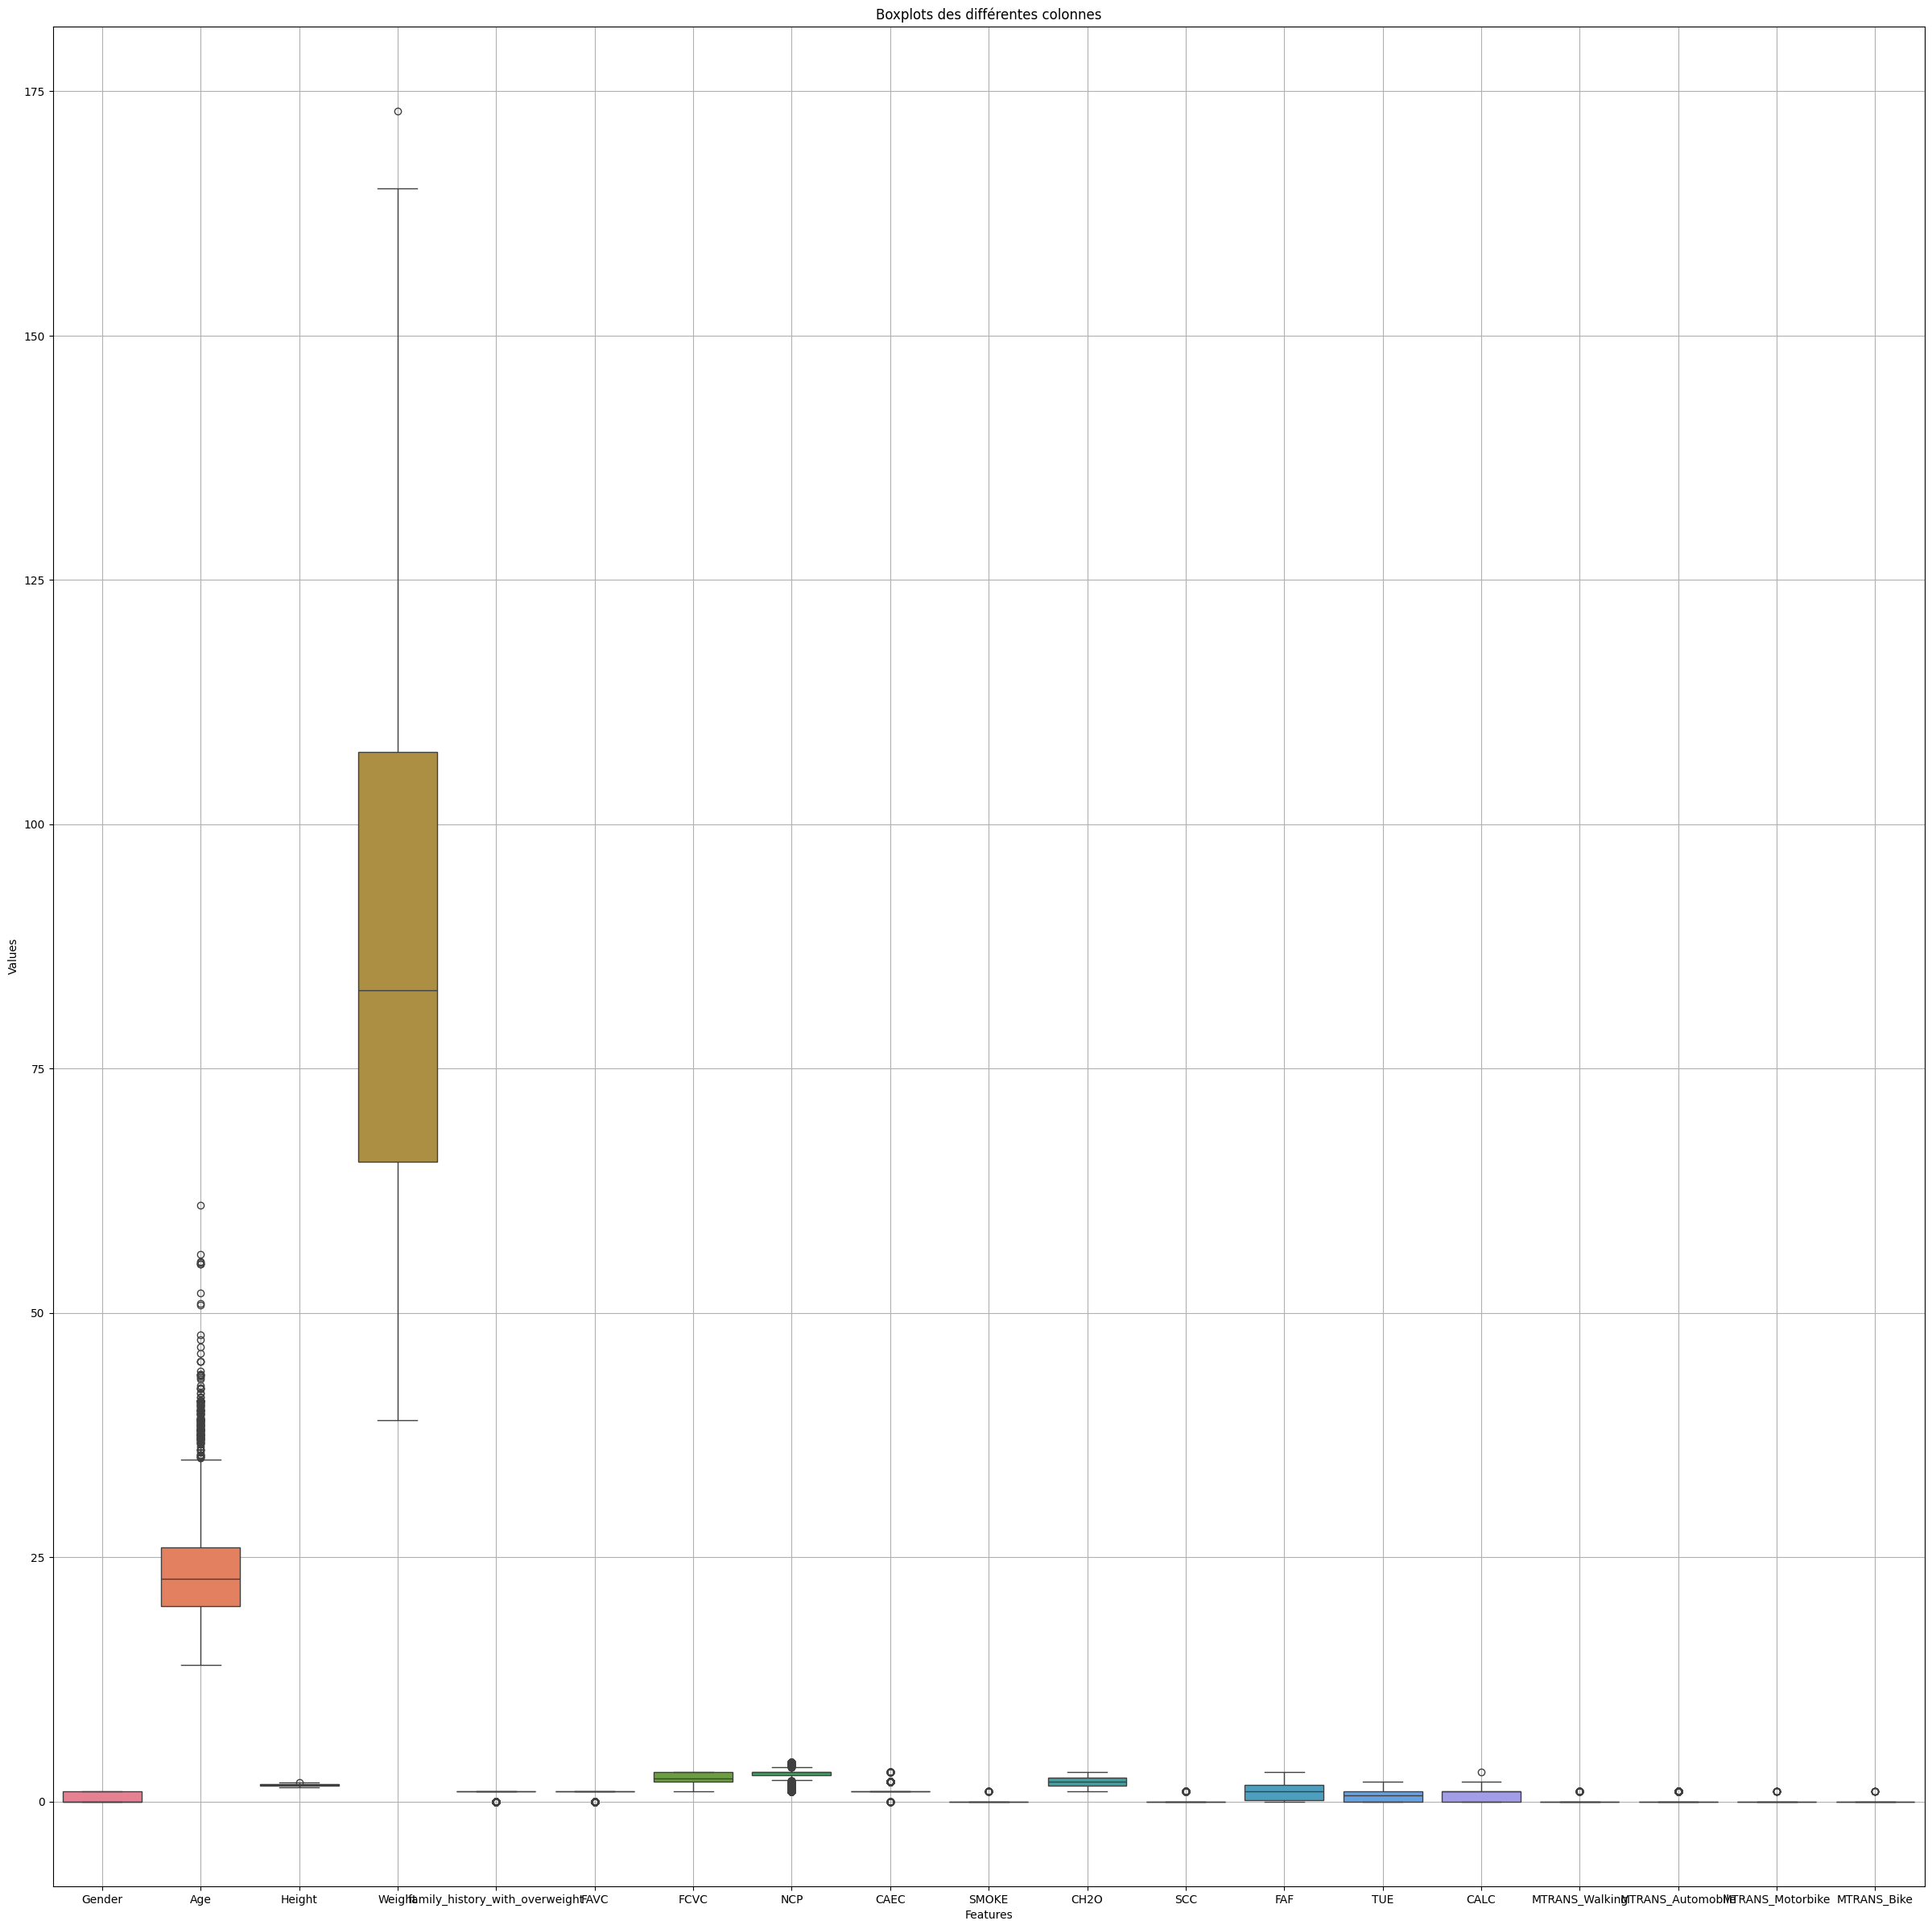

In [4]:
# Visualisation des outliers à l'aide de boxplots
plt.figure(figsize=(30, 30))  # Taille de la figure
sns.boxplot(data=X)
plt.xlabel("Features")  # Nom de l'axe X
plt.ylabel("Values")    # Nom de l'axe Y
plt.title("Boxplots des différentes colonnes")  # Titre
plt.grid(True)  # Ajout d'une grille pour plus de lisibilité
plt.show()


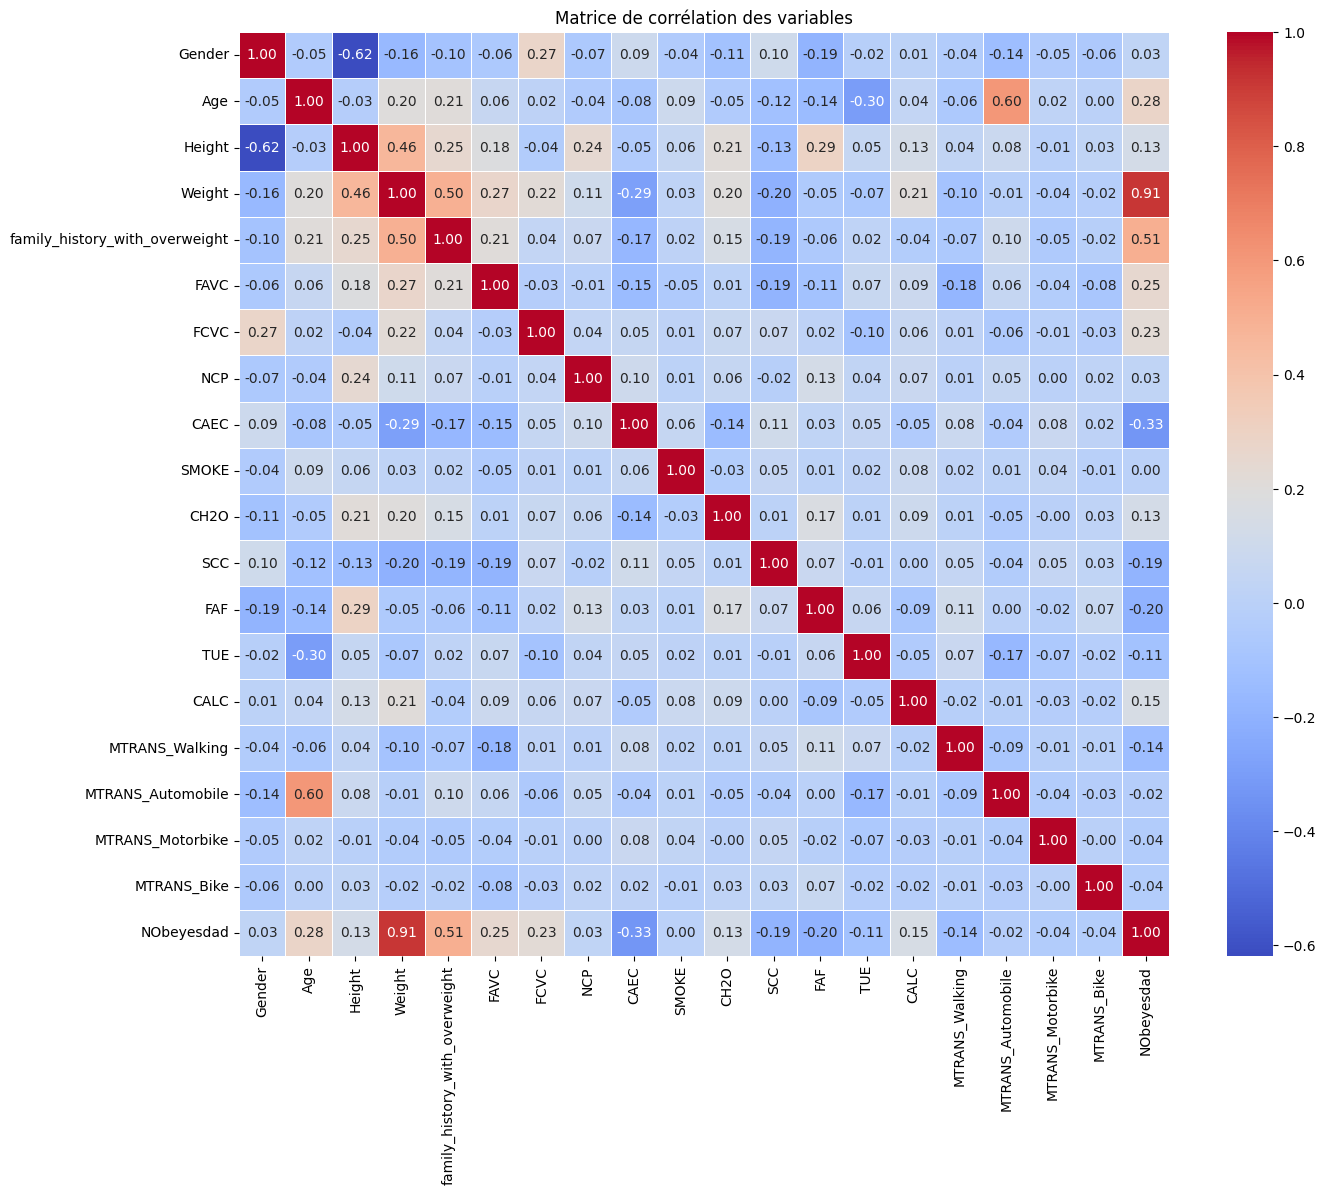

Top 10 des paires de variables les plus corrélées :
Weight                          NObeyesdad           0.913251
Height                          Gender               0.618466
Age                             MTRANS_Automobile    0.604683
family_history_with_overweight  NObeyesdad           0.505148
                                Weight               0.496820
Height                          Weight               0.463136
NObeyesdad                      CAEC                 0.329350
TUE                             Age                  0.296931
FAF                             Height               0.294709
Weight                          CAEC                 0.287493
dtype: float64


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger les données transformées
X = pd.read_csv("X_transformed.csv")
y = pd.read_csv("y_transformed.csv")

# Fusionner X et y pour la corrélation globale
full_data = pd.concat([X, y], axis=1)

# Calcul de la matrice de corrélation
correlation_matrix = full_data.corr()

# Affichage de la heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matrice de corrélation des variables")
plt.show()

# Afficher les corrélations les plus élevées (en valeur absolue)
corr_unstacked = correlation_matrix.unstack().abs()
corr_sorted = corr_unstacked.sort_values(ascending=False)
high_corr_pairs = corr_sorted[corr_sorted < 1].drop_duplicates()
print("Top 10 des paires de variables les plus corrélées :")
print(high_corr_pairs.head(10))

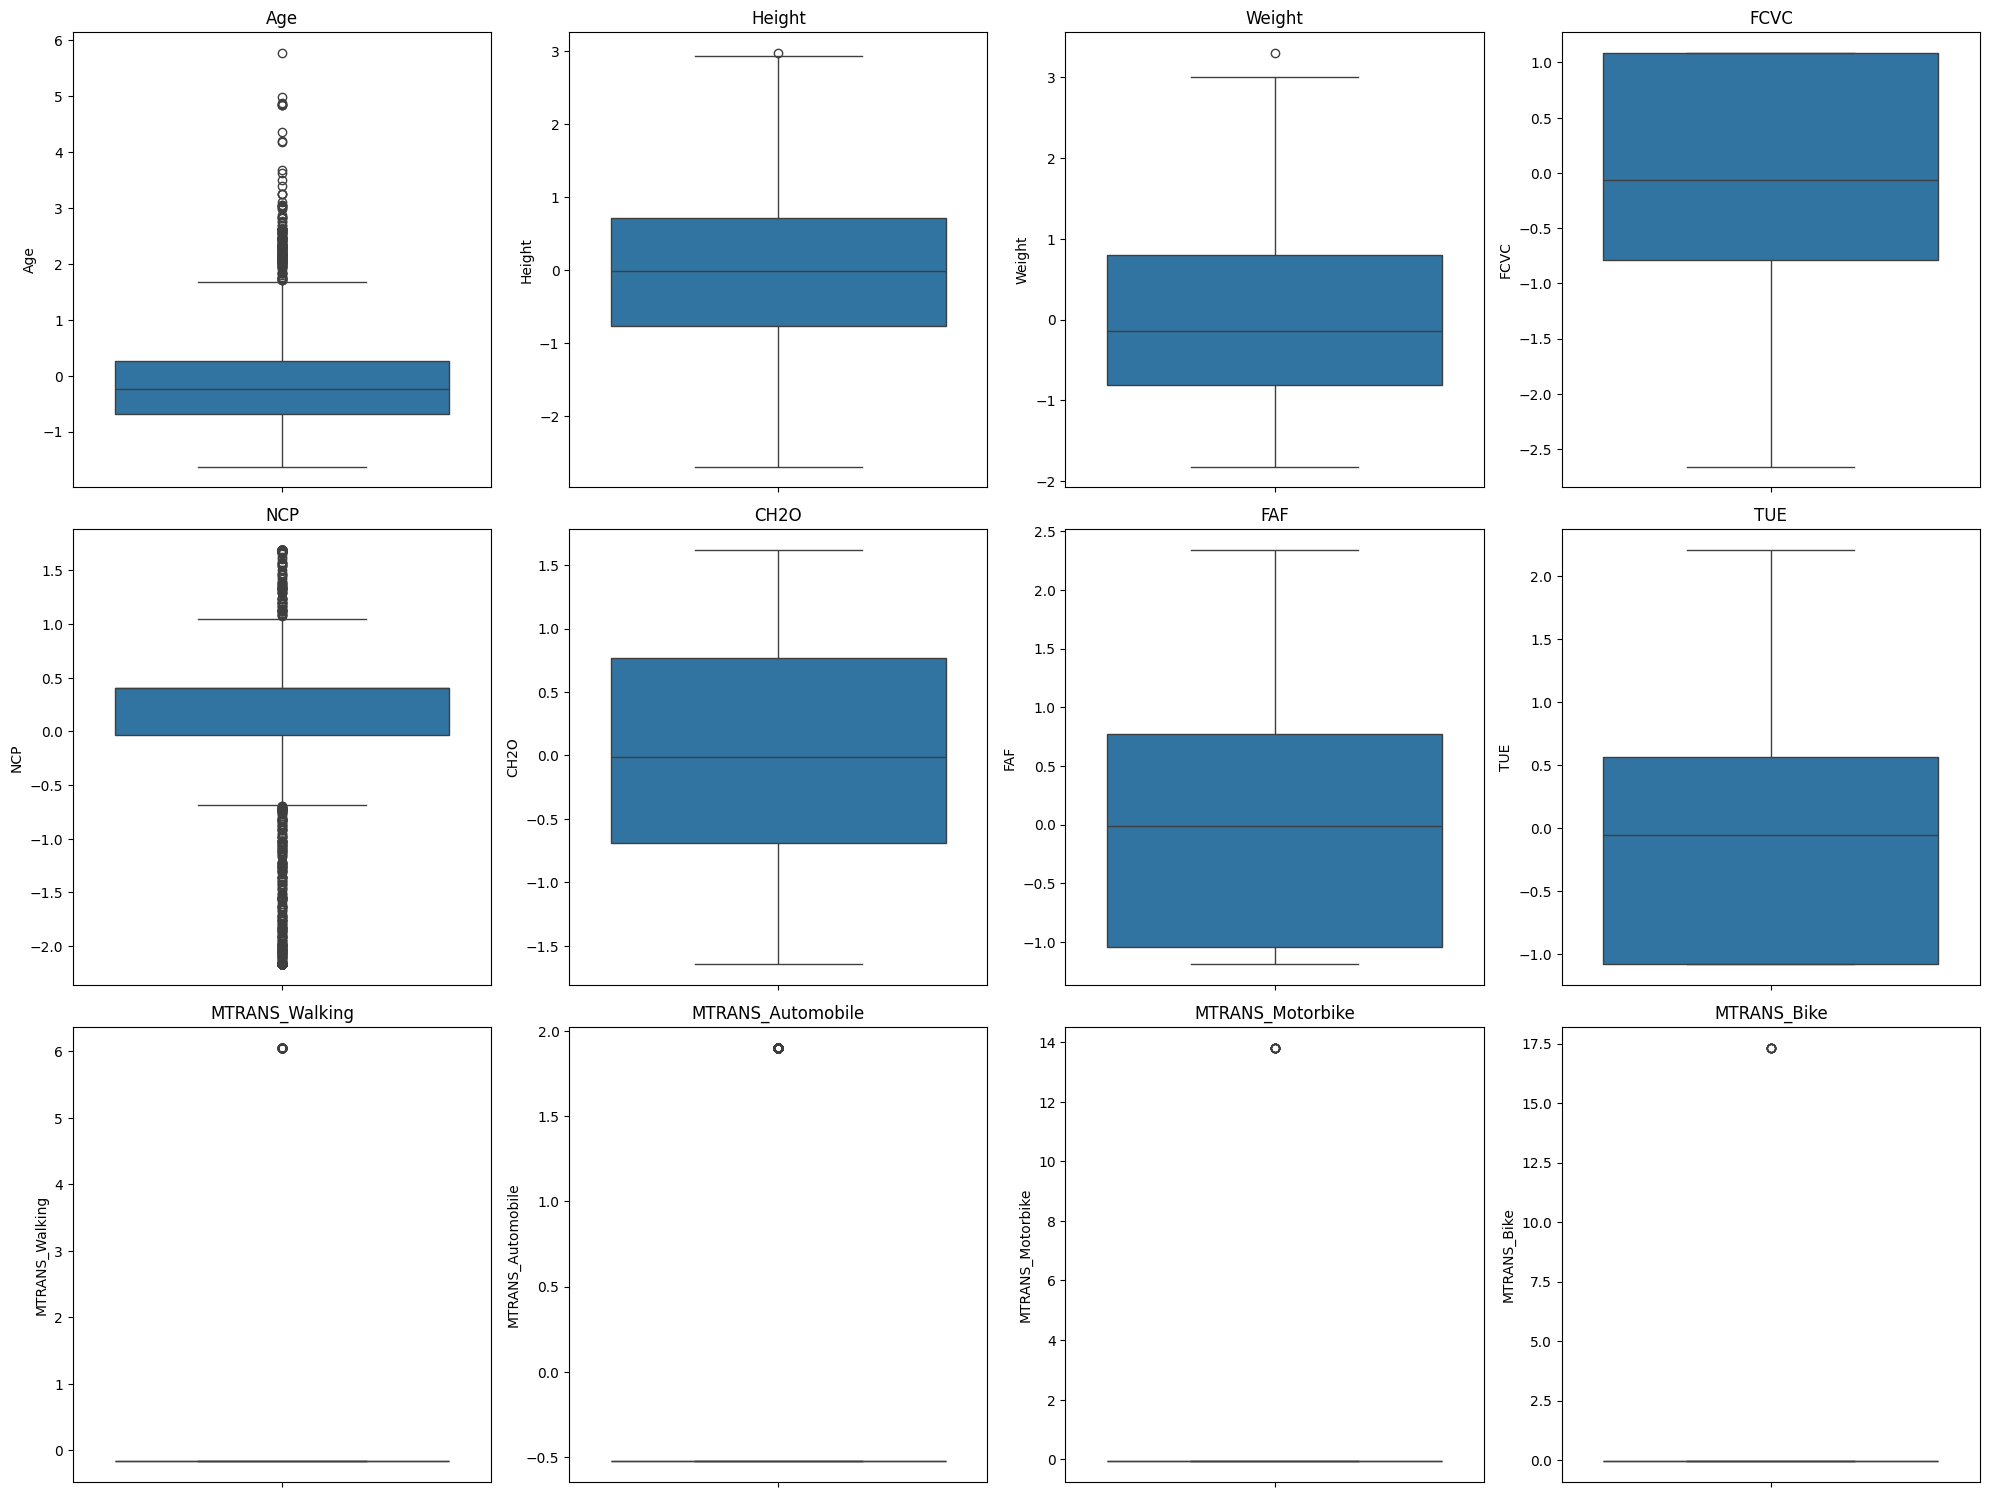

In [5]:
# Sélectionner uniquement les colonnes numériques pour éviter les erreurs
numeric_cols = X.select_dtypes(include=[np.number]).columns
X_numeric = X[numeric_cols]

# Standardisation pour faciliter la visualisation
X_scaled = (X_numeric - X_numeric.mean()) / X_numeric.std()

# Création de subplots pour une meilleure lisibilité
num_cols = len(X_numeric.columns)
fig, axes = plt.subplots(nrows=(num_cols // 4) + 1, ncols=4, figsize=(20, 5 * ((num_cols // 4) + 1)))

# Boucle sur les colonnes pour tracer chaque boxplot
for i, col in enumerate(X_numeric.columns):
    row, col_idx = divmod(i, 4)  # Déterminer la position dans la grille
    sns.boxplot(y=X_scaled[col], ax=axes[row, col_idx])
    axes[row, col_idx].set_title(col)

# Supprimer les sous-graphiques vides
for j in range(i + 1, len(axes.flat)):
    fig.delaxes(axes.flat[j])

plt.tight_layout()
plt.show()


*Identification et Gestion des Outliers*

In [6]:
# Calcul de la matrice de corrélation
correlation_matrix = df_capped.corr()

# Affichage du heatmap de corrélation
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matrice de corrélation")
plt.show()

# Détection des corrélations fortes (seuil > 0.6 ou < -0.6)
threshold = 0.6
strong_correlations = correlation_matrix[(correlation_matrix > threshold) | (correlation_matrix < -threshold)]
strong_correlations.dropna(how='all', inplace=True)
print(strong_correlations)

NameError: name 'df_capped' is not defined

Taille de X avant filtrage : (2111, 19)
Taille de X après filtrage : (2014, 19)
Taille de y après synchronisation : (2014, 1)


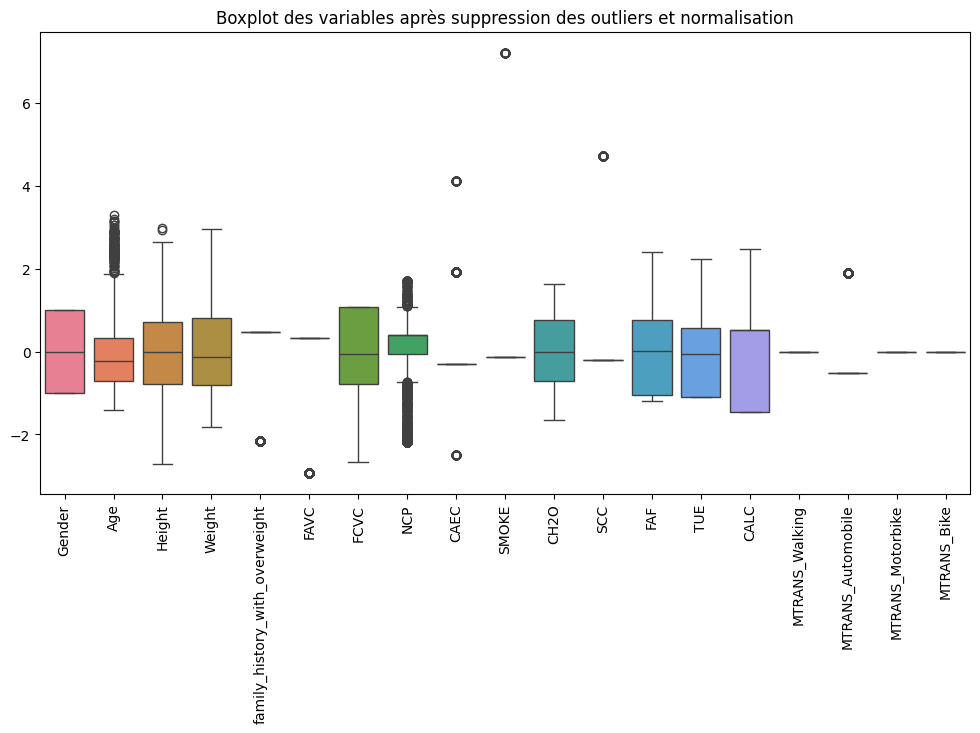

   Gender       Age    Height    Weight  family_history_with_overweight  \
0     1.0 -0.536855 -0.874709 -0.878404                        0.462584   
1     1.0 -0.536855 -1.949601 -1.181663                        0.462584   
2    -1.0 -0.190921  1.060098 -0.385608                        0.462584   
3    -1.0 -0.363888  0.845119  0.099606                       -2.161768   
4    -1.0  0.846881 -0.874709 -1.295386                       -2.161768   

       FAVC      FCVC       NCP      CAEC     SMOKE      CH2O       SCC  \
0 -2.930951 -0.786757  0.408292 -0.286956 -0.138675 -0.013033 -0.211201   
1 -2.930951  1.087626  0.408292 -0.286956  7.211103  1.625798  4.734829   
2 -2.930951 -0.786757  0.408292 -0.286956 -0.138675 -0.013033 -0.211201   
3 -2.930951 -0.786757 -2.171928 -0.286956 -0.138675 -0.013033 -0.211201   
4  0.341186 -0.786757  0.408292 -0.286956 -0.138675 -0.013033 -0.211201   

        FAF       TUE      CALC  MTRANS_Walking  MTRANS_Automobile  \
0 -1.193804  0.566333 -1.457

In [ ]:
# Standardisation préalable pour éviter l'effet de l'échelle sur la détection des outliers
scaler = StandardScaler()
X_scaled_temp = pd.DataFrame(scaler.fit_transform(X.select_dtypes(include=['float64', 'int64'])), 
                             columns=X.select_dtypes(include=['float64', 'int64']).columns)

# Suppression des outliers colonne par colonne
z_scores = np.abs(stats.zscore(X_scaled_temp))
X_filtered = X[(z_scores < 3).all(axis=1)]  # On garde les lignes où toutes les colonnes sont dans [-3, 3]

# Mettre à jour y pour garder la correspondance avec X_filtered
y_filtered = y.loc[X_filtered.index]

# Standardisation après suppression des outliers
scaler_final = StandardScaler()
X_final = pd.DataFrame(scaler_final.fit_transform(X_filtered), columns=X_filtered.columns)

# Vérification des dimensions
print(f"Taille de X avant filtrage : {X.shape}")
print(f"Taille de X après filtrage : {X_filtered.shape}")
print(f"Taille de y après synchronisation : {y_filtered.shape}")

# Visualisation des données après nettoyage
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_final)
plt.xticks(rotation=90)
plt.title("Boxplot des variables après suppression des outliers et normalisation")
plt.show()

# Afficher les premières lignes
print(X_final.head())


In [ ]:
# Fusionner X et y en un seul tableau
full_data = pd.concat([X_final, y_filtered], axis=1)

# Sauvegarder les données transformées au format CSV
full_data.to_csv("full_data_transformed_no_outliers.csv", index=False)

# Afficher les 5 premières lignes après transformation
print(full_data.head())


   Gender       Age    Height    Weight  family_history_with_overweight  \
0     1.0 -0.536855 -0.874709 -0.878404                        0.462584   
1     1.0 -0.536855 -1.949601 -1.181663                        0.462584   
2    -1.0 -0.190921  1.060098 -0.385608                        0.462584   
3    -1.0 -0.363888  0.845119  0.099606                       -2.161768   
4    -1.0  0.846881 -0.874709 -1.295386                       -2.161768   

       FAVC      FCVC       NCP      CAEC     SMOKE      CH2O       SCC  \
0 -2.930951 -0.786757  0.408292 -0.286956 -0.138675 -0.013033 -0.211201   
1 -2.930951  1.087626  0.408292 -0.286956  7.211103  1.625798  4.734829   
2 -2.930951 -0.786757  0.408292 -0.286956 -0.138675 -0.013033 -0.211201   
3 -2.930951 -0.786757 -2.171928 -0.286956 -0.138675 -0.013033 -0.211201   
4  0.341186 -0.786757  0.408292 -0.286956 -0.138675 -0.013033 -0.211201   

        FAF       TUE      CALC  MTRANS_Walking  MTRANS_Automobile  \
0 -1.193804  0.566333 -1.457

In [ ]:
X_final.shape

(2014, 19)

In [ ]:
y_filtered.shape

(2014, 1)

*Vérification de l’Équilibre des Classes et Documentation de la Stratégie d’Échantillonnage*

Type de y_clean: <class 'pandas.core.series.Series'>
Shape de y_clean: (2111,)
Dtype de y_clean: object
Valeurs uniques de y_clean: [1 2 3 4 0 5 6]


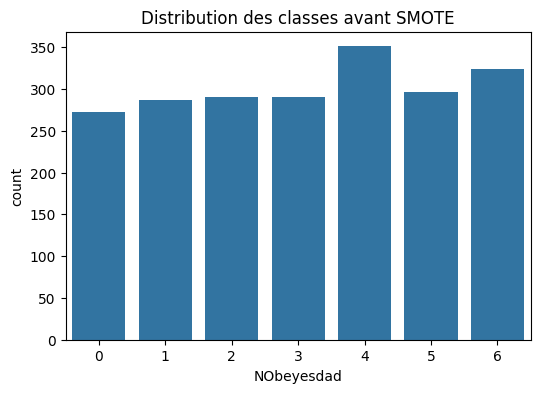

Distribution avant SMOTE :
NObeyesdad
4    351
6    324
5    297
2    290
3    290
1    287
0    272
Name: count, dtype: int64
Distribution après SMOTE :
NObeyesdad
1    0.142857
2    0.142857
3    0.142857
4    0.142857
0    0.142857
5    0.142857
6    0.142857
Name: proportion, dtype: float64


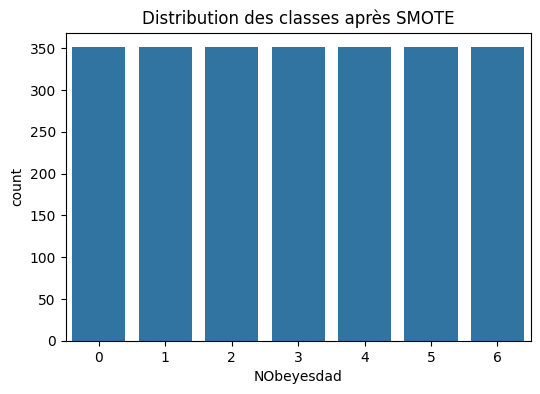

In [ ]:
# Vérifier si y est un DataFrame ou une Series et le convertir proprement
if isinstance(y, pd.DataFrame):
    y_clean = y.iloc[:, 0]  # Extraire la colonne unique
else:
    y_clean = pd.Series(y)  # Convertir en Series si nécessaire

# Afficher les informations sur y_clean
print(f"Type de y_clean: {type(y_clean)}")
print(f"Shape de y_clean: {y_clean.shape}")
print(f"Dtype de y_clean: {y_clean.dtype}")
print(f"Valeurs uniques de y_clean: {y_clean.unique()}")

# Vérifier si y_clean est une variable continue et la transformer en classes
if y_clean.dtype in ['float64', 'float32']:  
    y_clean = pd.qcut(y_clean, q=3, labels=[0, 1, 2])  # Découpage en quantiles (équilibre les classes)

# Conversion en entier si nécessaire
y_clean = y_clean.astype(int)

# Visualisation de la distribution initiale des classes
plt.figure(figsize=(6, 4))
sns.countplot(x=y_clean)
plt.title("Distribution des classes avant SMOTE")
plt.show()

# Vérifier l'équilibre des classes avant d'appliquer SMOTE
class_counts = y_clean.value_counts()
print(f"Distribution avant SMOTE :\n{class_counts}")

if len(class_counts) > 1:  # Vérifier qu'il y a plus d'une classe pour éviter une erreur avec SMOTE
    # Appliquer SMOTE
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y_clean)

    # Vérifier la distribution après SMOTE
    class_distribution_resampled = pd.Series(y_resampled).value_counts(normalize=True)
    print(f"Distribution après SMOTE :\n{class_distribution_resampled}")

    # Afficher la distribution des classes après rééchantillonnage
    plt.figure(figsize=(6, 4))
    sns.countplot(x=y_resampled)
    plt.title("Distribution des classes après SMOTE")
    plt.show()
else:
    print("SMOTE non appliqué : une seule classe détectée.")



*Corrélation*

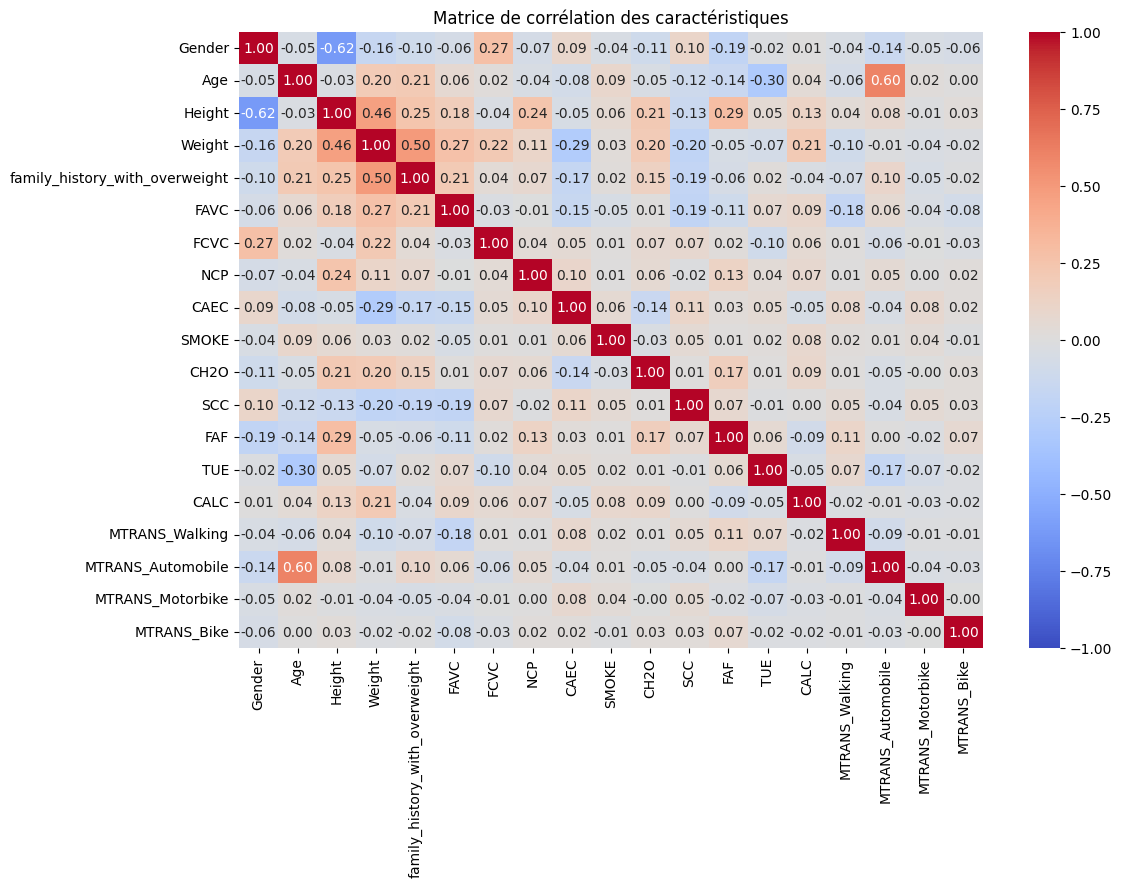

Paires de caractéristiques fortement corrélées (corrélation > 0.9) :

Données après suppression des caractéristiques fortement corrélées :
  Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  NCP  \
0      1  21.0    1.62    64.0                              1    0   2.0  3.0   
1      1  21.0    1.52    56.0                              1    0   3.0  3.0   
2      0  23.0    1.80    77.0                              1    0   2.0  3.0   
3      0  27.0    1.80    87.0                              0    0   3.0  3.0   
4      0  22.0    1.78    89.8                              0    0   2.0  1.0   

  CAEC SMOKE  CH2O SCC  FAF  TUE CALC  MTRANS_Walking  MTRANS_Automobile  \
0    1     0   2.0   0  0.0  1.0    0               0                  0   
1    1     1   3.0   1  3.0  0.0    1               0                  0   
2    1     0   2.0   0  2.0  1.0    2               0                  0   
3    1     0   2.0   0  2.0  0.0    2               1                 

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calcul de la matrice de corrélation pour les colonnes numériques
correlation_matrix = X.corr()

# Visualisation de la matrice de corrélation avec un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Matrice de corrélation des caractéristiques")
plt.show()

# Identifier les paires de caractéristiques fortement corrélées (seuil de 0.9)
threshold = 0.9
strongly_correlated = []

# Itérer sur la matrice de corrélation pour identifier les paires de caractéristiques avec une corrélation > 0.9
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            strongly_correlated.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# Afficher les paires de caractéristiques fortement corrélées
print("Paires de caractéristiques fortement corrélées (corrélation > 0.9) :")
for pair in strongly_correlated:
    print(f"{pair[0]} et {pair[1]} : Corrélation = {pair[2]:.2f}")

# Stratégie de gestion des corrélations : suppression de l'une des caractéristiques fortement corrélées
# Nous allons supprimer une des caractéristiques de chaque paire fortement corrélée
# Vous pouvez choisir de supprimer la première ou la seconde caractéristique selon le domaine (en fonction de leur importance).

for pair in strongly_correlated:
    X.drop(columns=[pair[0]], inplace=True)  # Suppression de la première caractéristique de chaque paire corrélée

# Afficher les 5 premières lignes des données après suppression des caractéristiques fortement corrélées
print("\nDonnées après suppression des caractéristiques fortement corrélées :")
print(X.head())

# Si nécessaire, appliquer PCA pour réduire la dimensionnalité (optionnel)
from sklearn.decomposition import PCA

# Appliquer PCA si vous souhaitez réduire la dimensionnalité
pca = PCA(n_components=0.95)  # Conserver 95% de la variance expliquée
X_pca = pca.fit_transform(X)

# Afficher la variance expliquée par chaque composante
print(f"Variance expliquée par chaque composante PCA : {pca.explained_variance_ratio_}")
